<a href="https://colab.research.google.com/github/JoelForson/MISM-3525-01-Modeling-for-Business-Analytics/blob/main/Problem%20Set%201/Problem_Set_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
# Create Stochastic Variables
np.random.seed(321)
demand = np.random.normal(loc = 2300, scale = 300, size = 1000)
demand = np.round(demand, 0)
PalletCost = np.random.normal(loc = 45, scale = 8, size = 1000)
PalletCost = np.round(PalletCost, 0)

print(np.mean(demand))
print("-"* 10)
print(np.mean(PalletCost))

2309.656
----------
44.718


In [93]:
#Add Deterministic Variables
Revenue = 180
MonthlyCost = 12000
CurrentCap = 2000
LeaseCost = 0

In [94]:
#Define Profit Funciton Profit (S1)= (Revenue - Variable) x min(demand, Capacity) - Fixed Costs
def ProfitCalc_S1(demandlvl, Palletcostlvl, rev, overhead, capacity, lease):
  profit = (rev - Palletcostlvl) * np.minimum(demandlvl, capacity) - overhead - lease
  return(profit)

profit1 = ProfitCalc_S1(demand, PalletCost, Revenue, MonthlyCost, CurrentCap, LeaseCost)

In [95]:
#Define Profit Funciton Profit (S2)= (Revenue - Variable) x min(demand, Capacity) - Fixed Costs
def ProfitCalc_S2(demandlvl, Palletcostlvl, rev, overhead, capacity, lease):
  profit = (rev - Palletcostlvl) * np.minimum(demandlvl, capacity) - overhead - lease
  return(profit)

profit2 =ProfitCalc_S2(demand, PalletCost, Revenue, MonthlyCost, CurrentCap + 400, LeaseCost + 3500)

In [96]:
#Define Profit Funciton Profit (S3)= (Revenue - Variable) x min(demand, Capacity) - Fixed Costs
def ProfitCalc_S3(demandlvl, Palletcostlvl, rev, overhead, capacity, lease):
  profit = (rev - Palletcostlvl) * np.minimum(demandlvl, capacity) - overhead - lease
  return(profit)

profit3 = ProfitCalc_S3(demand, PalletCost, Revenue, MonthlyCost, CurrentCap + 800, LeaseCost + 6500)

In [97]:

profitpercentage1 = sum(profit1 > 260000) / len(profit1) * 100
profitpercentage2 = sum(profit2 > 260000) / len(profit2) * 100
profitpercentage3 = sum(profit3 > 260000) / len(profit3) * 100

print(f"% of profit > 260,000: {profitpercentage1:.2f}%,{profitpercentage2:.2f}%, {profitpercentage3:.2f}% ")


losspercentage1 = sum(demand > 2000) / len(demand) * 100
losspercentage2 = sum(demand > 2400) / len(demand) * 100
losspercentage3 = sum(demand > 2800) / len(demand) * 100

import pandas as pd

SummaryTable = pd.DataFrame({
    'Scenario 1': [np.mean(profit1), np.std(profit1), profitpercentage1, losspercentage1, np.percentile(profit1, 5)],
    'Scenario 2': [np.mean(profit2), np.std(profit2), profitpercentage2, losspercentage2, np.percentile(profit2, 5)],
    'Scenario 3': [np.mean(profit3), np.std(profit3), profitpercentage3, losspercentage3, np.percentile(profit3, 5)]
}, index=['Mean Profit', 'Std Dev', '% profit >260k', '% months turning away', '5th percentile profit']).round(2)

SummaryTable

% of profit > 260,000: 39.40%,78.40%, 76.60% 


,Scenario 1,Scenario 2,Scenario 3
Mean Profit,255351.48,285982.95,293033.67
Std Dev,18621.38,32928.31,43016.37
% profit >260k,39.40,78.40,76.60
% months turning away,83.90,38.30,4.40
5th percentile profit,225271.75,227123.00,224123.00


<Axes: ylabel='Count'>

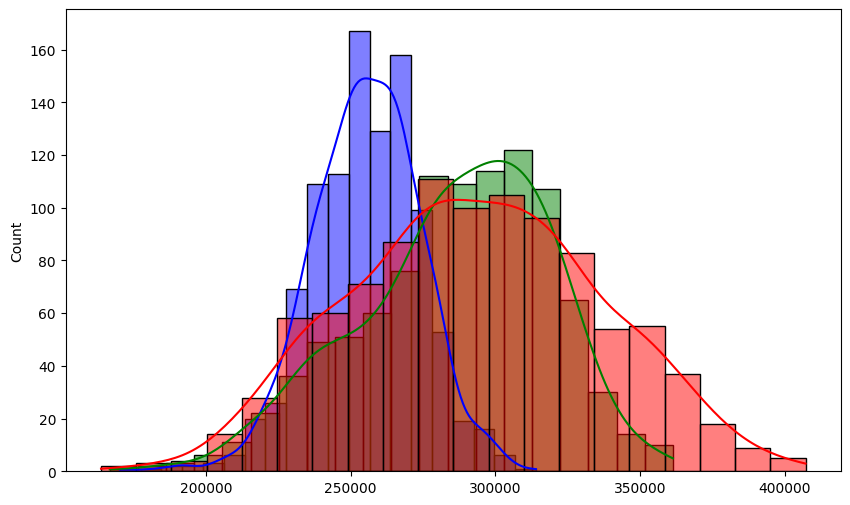

In [98]:
# Generate Histograms to Vizualize Profit Distribution


plt.figure(figsize=(10, 6))
sns.histplot(profit1, bins=20, kde=True, color='blue', label='Scenario 1')
sns.histplot(profit2, bins=20, kde=True, color='green', label='Scenario 2')
sns.histplot(profit3, bins=20, kde=True, color='red', label='Scenario 3')

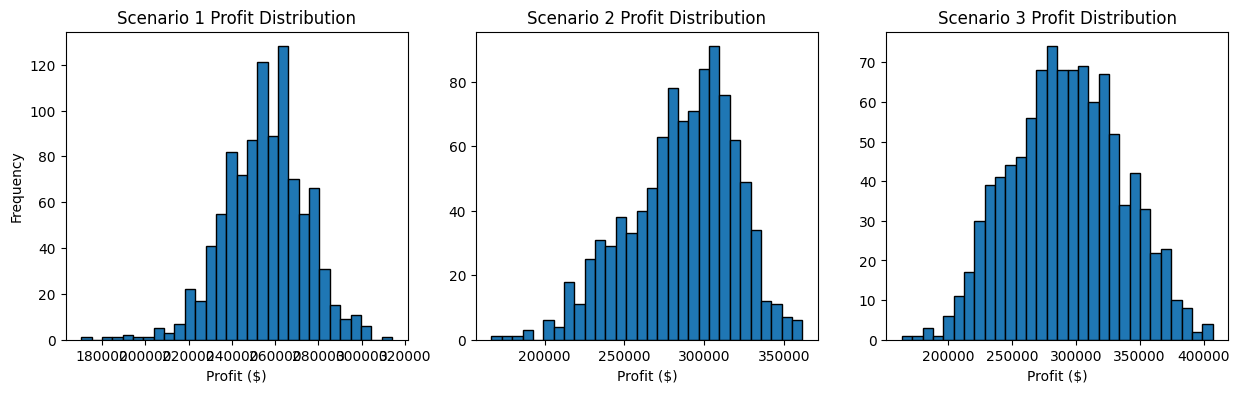

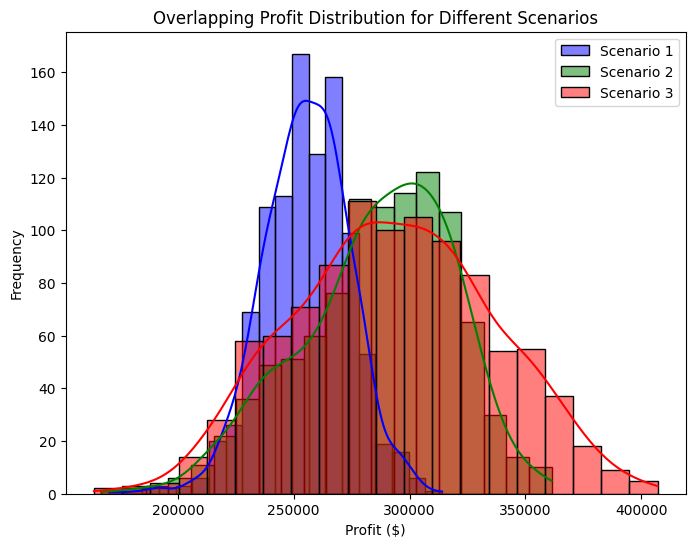

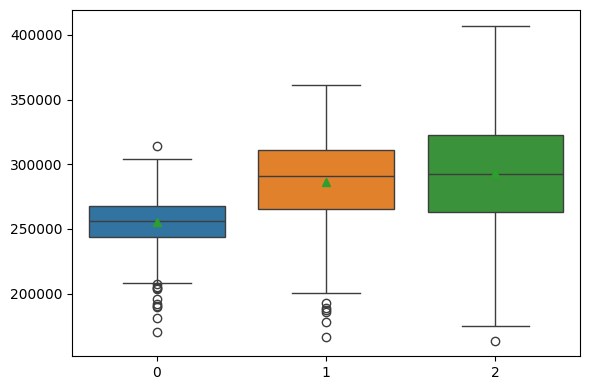

In [106]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(profit1, bins=30, edgecolor='black')
axes[0].set_title('Scenario 1 Profit Distribution')
axes[0].set_xlabel('Profit ($)')
axes[0].set_ylabel('Frequency')

axes[1].hist(profit2, bins=30, edgecolor='black')
axes[1].set_title('Scenario 2 Profit Distribution')
axes[1].set_xlabel('Profit ($)')

axes[2].hist(profit3, bins=30, edgecolor='black')
axes[2].set_title('Scenario 3 Profit Distribution')
axes[2].set_xlabel('Profit ($)')

plt.figure(figsize=(8, 6))
sns.histplot(profit1, bins=20, kde=True, color='blue', label='Scenario 1')
sns.histplot(profit2, bins=20, kde=True, color='green', label='Scenario 2')
sns.histplot(profit3, bins=20, kde=True, color='red', label='Scenario 3')
plt.title('Overlapping Profit Distribution for Different Scenarios')
plt.xlabel('Profit ($)')
plt.ylabel('Frequency')
plt.legend()


plt.figure(figsize= (6,4))
sns.boxplot(data=[profit1, profit2, profit3], showmeans=True)
plt.tight_layout()
plt.show()

For each scenario, calculate the average monthly revenue lost due to turning away customers when demand exceeds capacity. Also report the standard deviation of monthly lost revenue. Convert these to annual figures.

In [134]:
demand1 = np.minimum(demand, 2000)
demand2 = np.minimum(demand, 2400)
demand3 = np.minimum(demand, 2800)

In [137]:
s1revlost = np.where(demand - 2000 > 0, (demand - 2000) * Revenue, 0)
s1revlost = s1revlost.astype(int)

s2revlost = np.where(demand - 2400 > 0, (demand - 2400) * Revenue, 0)
s2revlost = s2revlost.astype(int)

s3revlost = np.where(demand - 2800 > 0, (demand - 2800) * Revenue, 0)
s3revlost = s3revlost.astype(int)

RevLost = pd.DataFrame({
    'Scenario 1': [np.mean(s1revlost), np.std(s1revlost), np.average(demand1)/2000],
    'Scenario 2': [np.mean(s2revlost), np.std(s2revlost), np.average(demand2)/2400],
    'Scenario 3': [np.mean(s3revlost), np.std(s3revlost), np.average(demand3)/2800]
}, index=['RevLost', 'Std Dev', 'Avg Capacity Utilization Rate']).round(2)

RevLost

,Scenario 1,Scenario 2,Scenario 3
RevLost,59952.96,14529.42,1142.46
Std Dev,47397.87,26035.67,6472.41
Avg Capacity Utilization Rate,0.99,0.93,0.82


**Based on these metrics, briefly discuss the trade-off between capacity utilization efficiency and revenue capture. Which scenario provides the best balance, in your opinion?**

Scenario 2 (S2)  provides the best balance between lost revenue and average capacity utilisation. Comparatively, when looking at Scenario 1 (S1), S2 is able to cut average loss by roughly \$32k, and be much less volitile by dececreasing standard deviation by around $14k. Average capacity does drop by 6%, however, if we were to choose Scenario 3 (S3), our utilisation would drop to 82%, therefore making S2 the best combination for both lost revenue and capacity.  S2 provides a better cvurb to revenue loss and  less volatilty, all while mainting 92% capacity usage on average.

**4. Make a final recommendation: Based on your simulation results, which capacity scenario should Harbor Logistics pursue? In 1-2 substantive paragraphs (150-200 words), write a response that:**

* **Recommends a specific scenario**
* Justifies your recommendation using specific metrics from your simulation
Discusses the risk-return tradeoff (consider both expected profit and opportunity cost of lost revenue (Question 3)
Identifies what additional information or analysis would strengthen this decision"

Based on the simulation results, we decided that Harbor Logistics should pursue Scenario 2. While Scenario 3 offers the highest expected profit (\$297,695 vs. \$284,524), Scenario 2 provides the optimal risk-return balance for sustainable operations.

Scenario 2 delivers a \$30,214 profit improvement over Scenario 1 while reducing monthly lost revenue from \$58,845 to just \$13,889—a 76% reduction. The moderate volatility (standard deviation of \$33,266) remains manageable, and the 36.7% rejection rate, though non-trivial, is substantially better than Scenario 1's 84.7%. Most importantly, Scenario 2 maintains a healthy 92.76% capacity utilization, ensuring efficient asset deployment without excessive idle capacity.
Scenario 3's marginal profit gain of \$13,171 over Scenario 2 doesn't justify its significantly higher risk profile. It's standard deviation increases 29% to \$43,034, and capacity utilization plummets to 82.06%, suggesting a big uptick in  wasted resources. The slightly better reduction of lost revenue provides limited practical benefit given the associated inefficiencies.